# Restricted Boltzmann Machine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/liyz/ann/rbm')
from rbm import RBM

## Load Mnist

In [2]:
import mnist
train_imgs = mnist.train_images()

## Plot Mnist data

In [3]:
def show_mnist(X, title = None, loc = 'center',**kwargs):
    num = X.shape[0]
    if num <= 10:
        imgs = np.moveaxis(X.reshape(-1, num, 28, 28), 1, 2).reshape(-1, num * 28)
        plt.figure(figsize=(num/2,num))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 100 and num % 10 == 0:
        imgs = np.moveaxis(X.reshape(-1, 10, 28, 28), 1, 2).reshape(-1, 10 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 200 and num % 20 == 0:
        imgs = np.moveaxis(X.reshape(-1, 20, 28, 28), 1, 2).reshape(-1, 20 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    else:
        print(f'{num} not fit, choose from:')
        print(list(range(1,10)))
        print([x for x in range(10,100,10)])
        print([x for x in range(100,1000,100)])

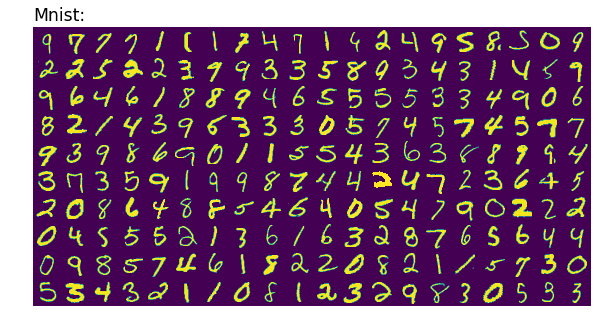

In [4]:
idxs = np.random.randint(0, len(train_imgs), 200) 
show_mnist(train_imgs[idxs],'Mnist:',loc = 'left', fontsize = 'xx-large')

## Initial RBM

In [5]:
mini_x = train_imgs[:5000]
mini_x = mini_x.reshape(5000,-1)
mini_x[mini_x>0] = 1
model = RBM(num_visible = 784, num_hidden = 100)

## Train data : Contrastive Divergence

In [6]:
model.cd(mini_x,5000)

Epoch 0: Error is 9794.008552075342
Epoch 100: Error is 2490.821142132424
Epoch 200: Error is 2124.791277587908
Epoch 300: Error is 1821.060822270396
Epoch 400: Error is 2088.8399577656355
Epoch 500: Error is 2132.29471819228
Epoch 600: Error is 1933.932920685531
Epoch 700: Error is 1791.2769063388068
Epoch 800: Error is 1664.7846278301818
Epoch 900: Error is 1924.439938352063
Epoch 1000: Error is 1645.0398240422737
Epoch 1100: Error is 2071.3792675054983
Epoch 1200: Error is 1585.899568783886
Epoch 1300: Error is 1650.4237158733467
Epoch 1400: Error is 1548.8266459830638
Epoch 1500: Error is 1837.9113833910947
Epoch 1600: Error is 1820.39537277458
Epoch 1700: Error is 1668.0658062658053
Epoch 1800: Error is 1857.3898362424675
Epoch 1900: Error is 1822.0275537242842
Epoch 2000: Error is 1816.6345865189044
Epoch 2100: Error is 1476.7755095098228
Epoch 2200: Error is 1679.035591472017
Epoch 2300: Error is 1815.1461151428753
Epoch 2400: Error is 1657.6994702943357
Epoch 2500: Error is 157

## Reconstruct data

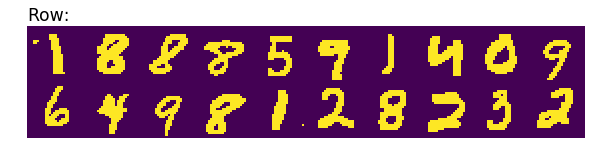

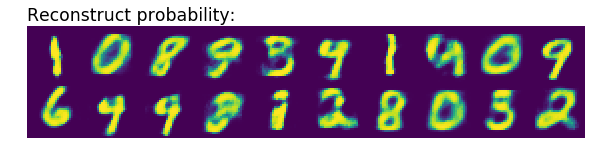

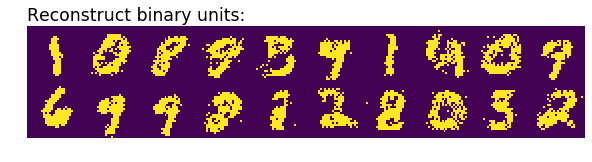

In [9]:
idxs = np.random.choice(5000, 20)
row = mini_x[idxs].reshape(20,-1)
reconstruct,units = model.reconstruct(row, 10)
show_mnist(row,'Row:', loc= 'left', fontsize = 'xx-large')
show_mnist(reconstruct,'Reconstruct probability:',loc = 'left', fontsize = 'xx-large')
show_mnist(units,'Reconstruct binary units:',loc = 'left', fontsize = 'xx-large')

## Reconstruct with 1 - value

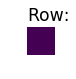

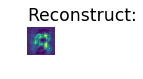

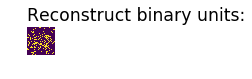

In [10]:
row = np.ones((1,28*28))
reconstruct,units = model.reconstruct(row)
show_mnist(row,'Row:', loc= 'left', fontsize = 'xx-large')
show_mnist(reconstruct,'Reconstruct:',loc = 'left', fontsize = 'xx-large')
show_mnist(units,'Reconstruct binary units:',loc = 'left', fontsize = 'xx-large')

## Visulize the Weights

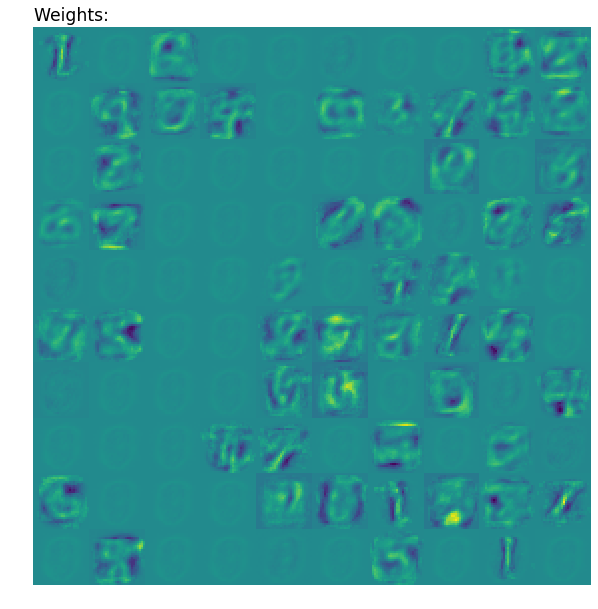

In [11]:
weights = model.weights.T
show_mnist(weights,'Weights:',loc = 'left', fontsize = 'xx-large')